In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('C://Data_sets//ML//train_smoke_comp.csv')

In [24]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


Text(0.5, 1.0, 'counts')

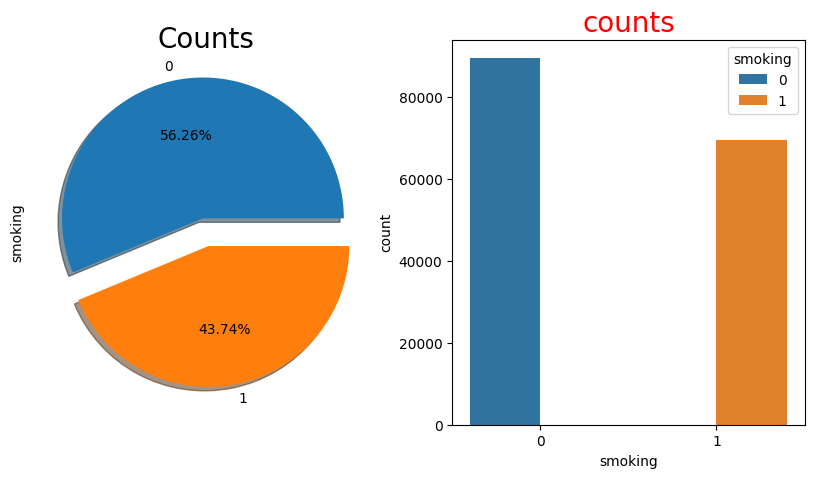

In [23]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
ax = data.smoking.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True)
ax.set_title('Counts',size=20)

ax = plt.subplot(1,2,2)
ax = sns.countplot(x='smoking',data=data,hue='smoking')
ax.set_title('counts',color='red',size=20)

In [29]:
sugar_data = pd.DataFrame(data={
    'systolic':data['systolic'],
    'relaxation':data['systolic'],
    'blood_sugar':data['fasting blood sugar'],
    'smoking':data['smoking']
})

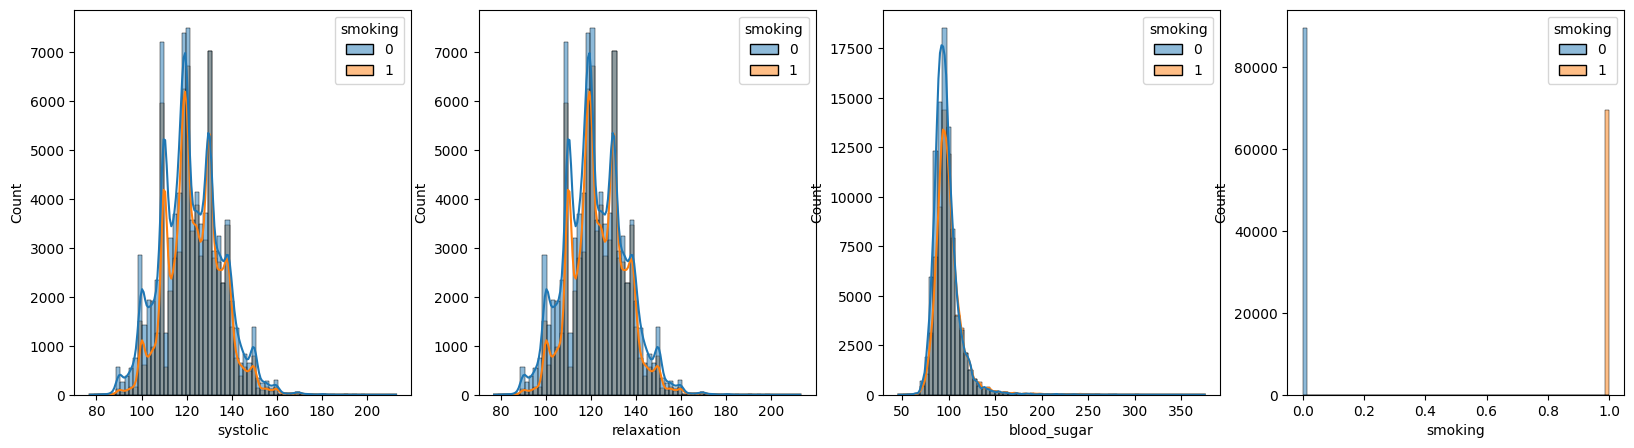

In [53]:
sugar_data = pd.DataFrame(data={
    'systolic':data['systolic'],
    'relaxation':data['systolic'],
    'blood_sugar':data['fasting blood sugar'],
    'smoking':data['smoking']
})
num_cols = len(sugar_data.columns)

plt.figure(figsize=(5 * num_cols, 5))
for i, col in enumerate(sugar_data.columns):
    
    plt.subplot(1,num_cols,i+1)
    sns.histplot(x=col,data=sugar_data,hue='smoking',kde=True,bins=70)

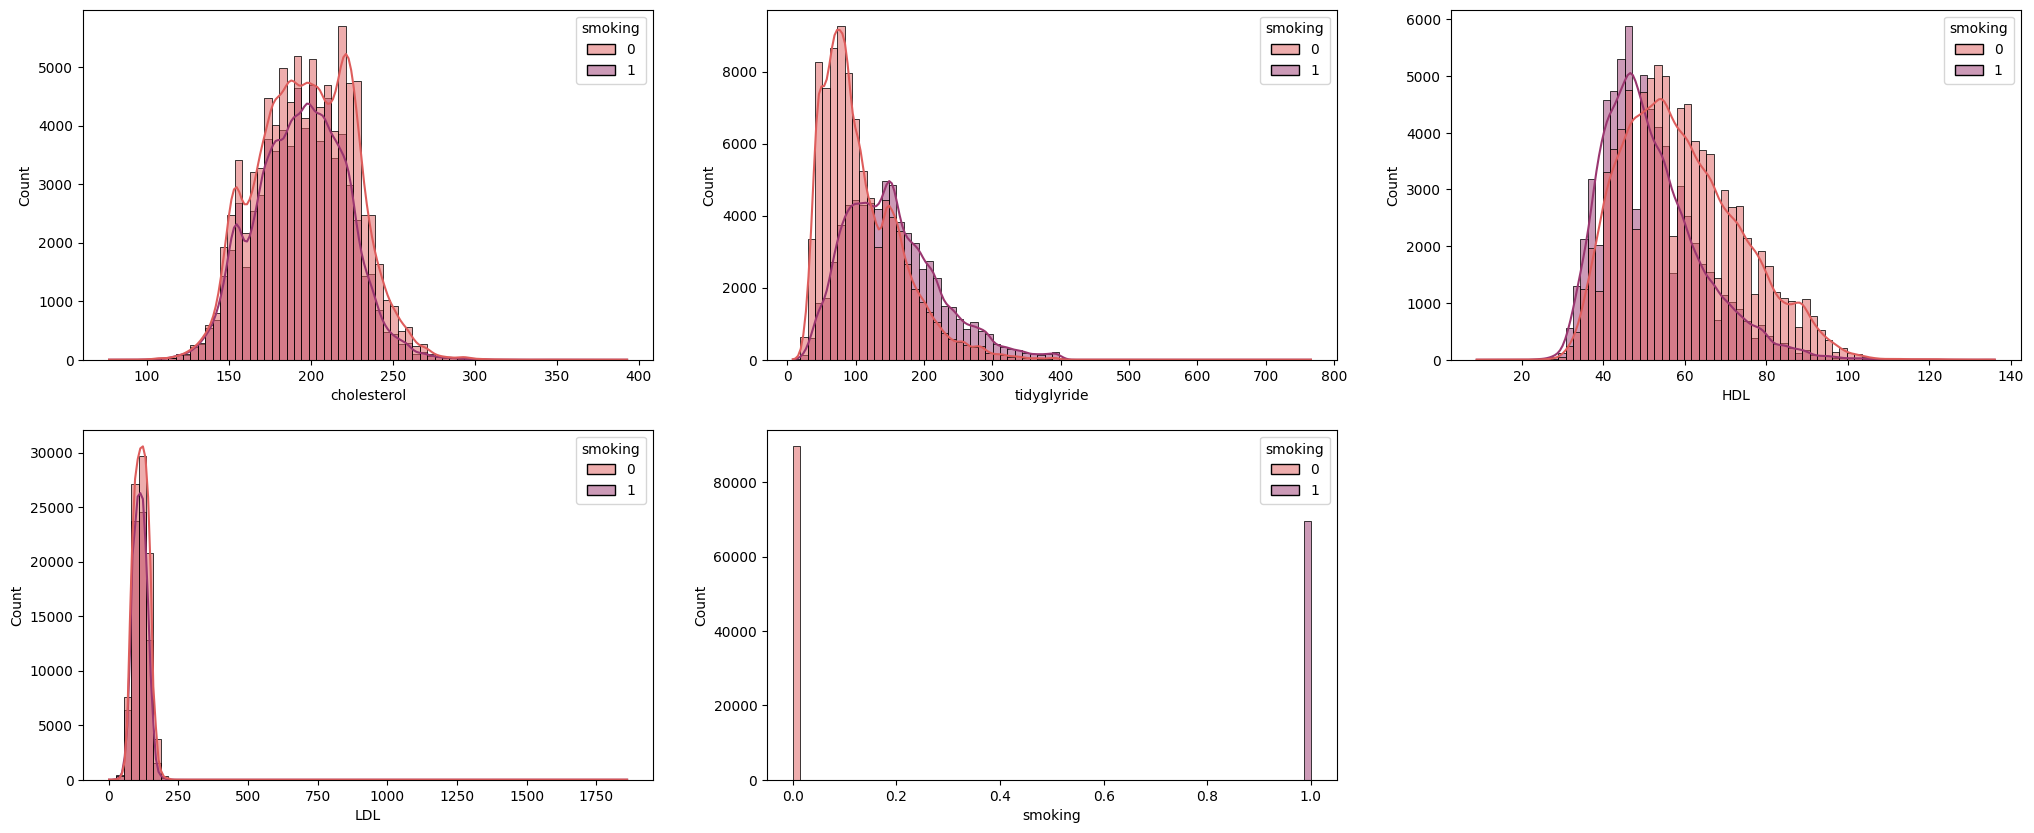

In [54]:
"""
hdl is good when is high, 
LDL is not good when high
"""
cholesterol_data = pd.DataFrame(data={
    'cholesterol':data['Cholesterol'],
    'tidyglyride':data['triglyceride'],
    'HDL':data['HDL'],
    'LDL':data['LDL'],
    'smoking':data['smoking']
})

num_cols = len(cholesterol_data.columns)

plt.figure(figsize=(5 * num_cols, 10))
for i, col in enumerate(cholesterol_data.columns):
    
    plt.subplot(2,3,i+1)
    sns.histplot(x=col,data=cholesterol_data,hue='smoking',kde=True,bins=70,palette='flare')

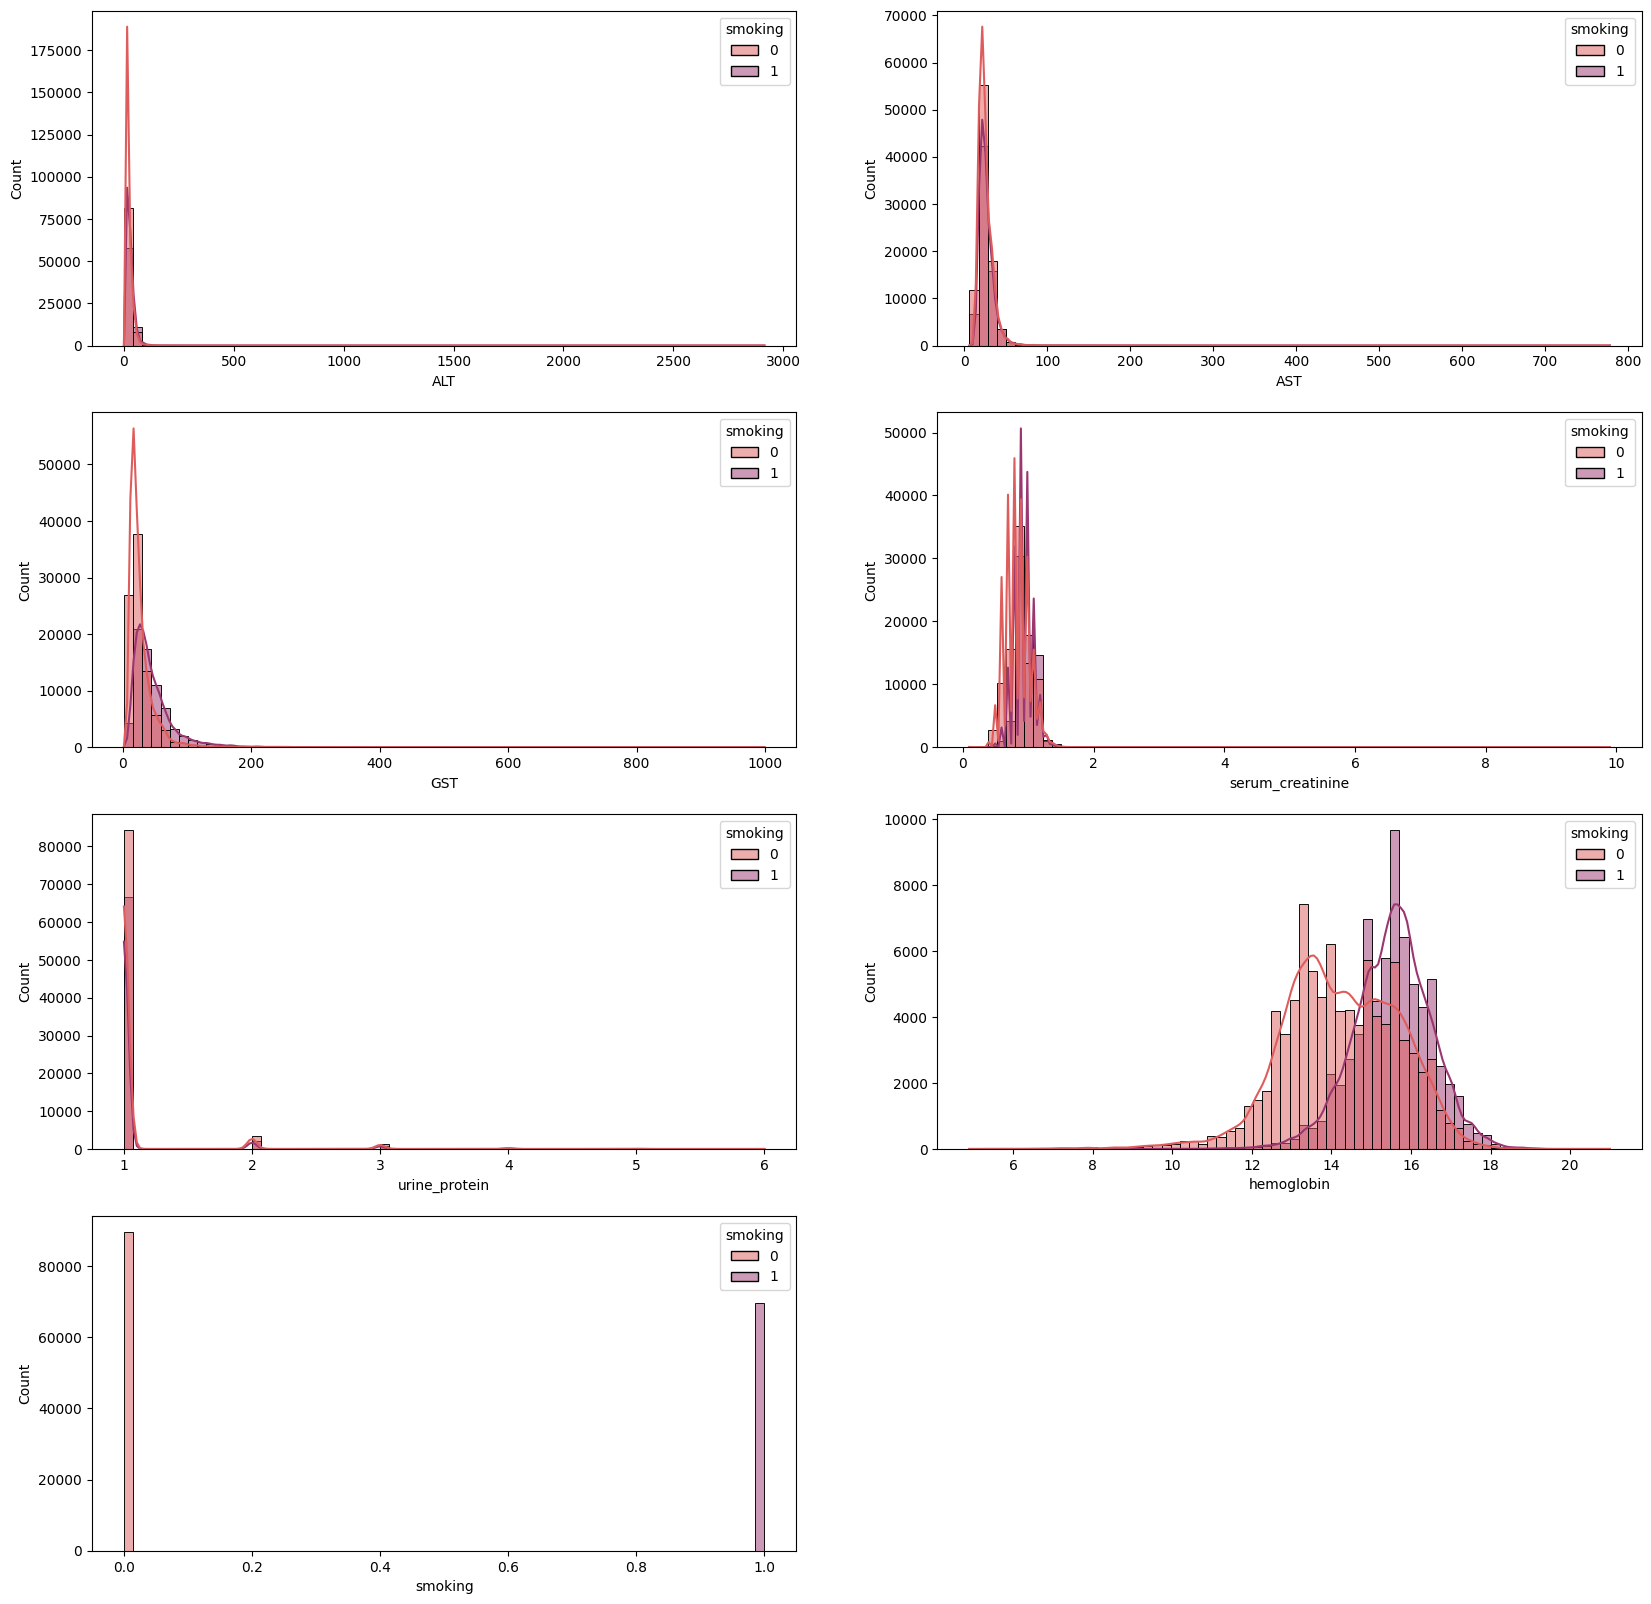

In [55]:
"""
alt, ast and gpt for liver disease
serum creatinine,urine protein for kidney disease 
"""
liver_data = pd.DataFrame(data={
    'ALT':data['ALT'],
    'AST':data['AST'],
    'GST':data['Gtp'],
    'serum_creatinine':data['serum creatinine'],
    'urine_protein':data['Urine protein'],
    'hemoglobin':data['hemoglobin'],
    'smoking':data['smoking']
})


num_cols = len(liver_data.columns)

plt.figure(figsize=(20, 20))
for i, col in enumerate(liver_data.columns):
    
    plt.subplot(4,2,i+1)
    sns.histplot(x=col,data=liver_data,hue='smoking',kde=True,bins=70,palette='flare')